# The chi-squared distribution
Verification of basic properties of the $\chi^2$-squared distribution.

---
tags: statistics, chi-squared distribution, sample standard deviation, sample standard error

# Imports

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

# Sum of squares of normals
We take as definition that the $\chi^2$-distribution with $n$ degrees if freedom is the distribution of the sum of squares of $n$ independent standard normal random variables, which we can write schematically as
$$$$
$$\sum_{i=1}^nX_i^2 \sim \chi^2(n)
\quad \textrm{where}\quad
X_i \sim N(0, 1)\qquad \textrm{for} \quad i=1, 2, \dots\, n\,.$$

The probability density function of the $\chi^2$-distribution with $n$ degrees of freedom can be calculated analytically:
$$f(x) = \frac1{2^{n/2}\Gamma(n/2)}x^{n/2-1}e^{-x/2}\,.$$

We verify this property by calculating the histogram of a sample of sufficient size (using `Scipy`'s statistics library).  We also display the histogram of the $p$-value, and verify that it is approximately uniform, as it should.

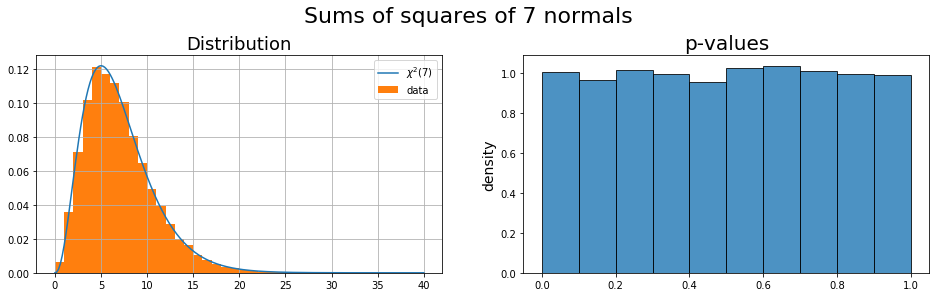

In [2]:
np.random.seed(42)

# Parameters (samples)
nb_samples = 10_000
sample_size = 7

df = sample_size

# Samples
samples = scipy.stats.norm.rvs(size=(nb_samples, sample_size))

# Sums of squares
sum2 = (samples**2).sum(axis=1)

# Distributions
# Sums of squares
c2h = .2
c2max = 40
c2 = np.arange(0, c2max + c2h, c2h)
pc2 = scipy.stats.chi2.pdf(c2, df=df)

# p-values
p_values = scipy.stats.chi2.cdf(sum2, df=df)

# Visualization
fig, axs = plt.subplots(1, 2, figsize=(16, 4))

# Chi-square distribution
axs[0].plot(c2, pc2, label=f'$\chi^2({sample_size})$')
bins = np.arange(0, c2max + 1, 1)
axs[0].hist(sum2, bins=bins, density=True, label='data')

axs[0].set_title(f"Distribution", fontsize=18)

axs[0].legend()
axs[0].grid();

bins = 10
axs[1].hist(p_values, bins=bins, density=True, alpha=.8, edgecolor='k', linewidth=1);
axs[1].set_title("p-values", fontsize=20)
axs[1].set_ylabel("density", fontsize=14)
axs[1].grid(False)

fig.suptitle(f"Sums of squares of {sample_size} normals", fontsize=22, y=1.05);

# Sums of squares of difference with sample means
We verify the fact that
$$\sum_{i=1}^n(X_ i- \overline X)^2 \sim \chi^2(n-1)
\quad \textrm{where}\quad X_i \sim N(0, 1)\quad \textrm{for}\quad i=1, 2, \dots, n\,.$$

## Verification via the sample standard deviation
We calculate the **sample standard deviation**
$$S_1 := \sqrt{\frac1{n-1}{\sum_{i=1}^n(X_ i- \overline X)^2}}
\qquad \text{since then}\qquad
(n-1)S_1^2 \sim \chi^2(n-1)\,.$$

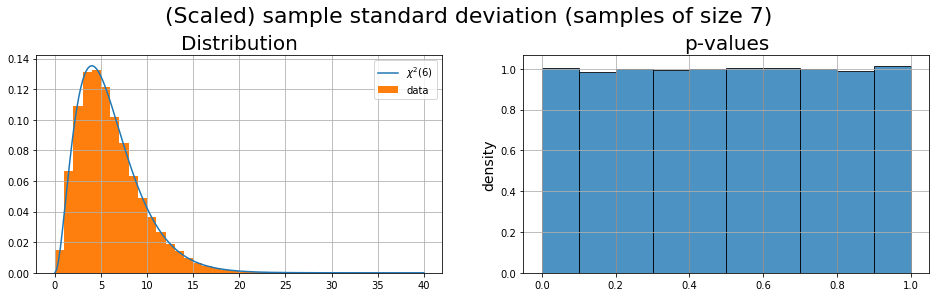

In [3]:
np.random.seed(42)

# Parameters (samples)
nb_samples = 100_000
sample_size = 7

ddof1 = 1
df1 = sample_size - ddof1

# Samples
samples = scipy.stats.norm.rvs(size=(nb_samples, sample_size))

# Sums of squares of differences with sample means:
# Squares of sample standard deviations, up to a multiplicative factor
std1 = np.std(samples, axis=1, ddof=ddof1) # sample standard deviation
sum2 = df1*std1**2

# Distributions
# Chi squared with df1=n-1 degrees of freedom
c2h = .2
c2max = 40
c2 = np.arange(0, c2max + c2h, c2h)
pc2 = scipy.stats.chi2.pdf(c2, df=df1)

# p-values
p_values = scipy.stats.chi2.cdf(sum2, df=df1)

# Visualization
fig, axs = plt.subplots(1, 2, figsize=(16, 4))
fig.suptitle(f"(Scaled) sample standard deviation (samples of size {sample_size})", fontsize=22, y=1.05)

axs[0].plot(c2, pc2, label=f'$\chi^2({df1})$')
bins = np.arange(0, c2max + 1, 1)
axs[0].hist(sum2, bins=bins, density=True, label='data')
axs[0].set_title("Distribution", fontsize=20)
axs[0].legend()
axs[0].grid();

bins = 10
axs[1].hist(p_values, bins=bins, density=True, alpha=.8, edgecolor='k', linewidth=1);
axs[1].set_title("p-values", fontsize=20)
axs[1].set_ylabel("density", fontsize=14)
axs[1].grid();

# Verification via the standard error
We calculate the **standard error of the mean** is 
$$\text{SE} := \frac{S_1}{\sqrt{n}}
\qquad\text{since then}\qquad
n(n-1)\text{SE}^2 \sim \chi^2(n-1)\,.$$

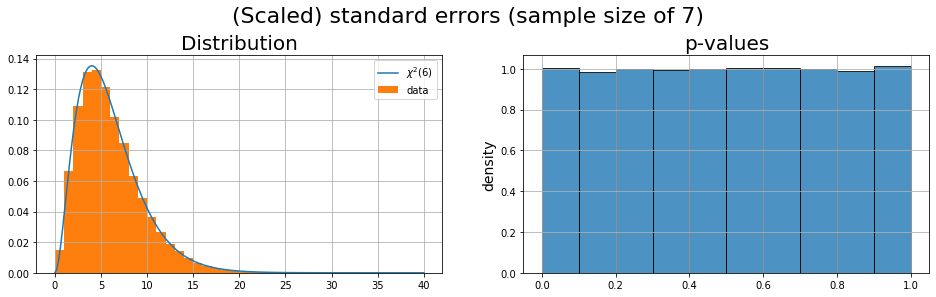

In [4]:
np.random.seed(42)

# Parameters (samples)
nb_samples = 100_000
sample_size = 7

ddof1 = 1
df1 = sample_size - ddof1

# Samples
samples = scipy.stats.norm.rvs(size=(nb_samples, sample_size))

# Sums of squares of differences with sample means:
# Squares of standard errors, up to a multiplicative factor
sems = scipy.stats.sem(samples, axis=1, ddof=ddof1)
sum2 = sample_size*df1*sems**2

# Distributions
# Chi squared with df1=n-1 degrees of freedom
c2h = .2
c2max = 40
c2 = np.arange(0, c2max + c2h, c2h)
pc2 = scipy.stats.chi2.pdf(c2, df=df1)

# p-values
p_values = scipy.stats.chi2.cdf(sum2, df=df1)

# Visualization
fig, axs = plt.subplots(1, 2, figsize=(16, 4))
fig.suptitle(f"(Scaled) standard errors (sample size of {sample_size})", fontsize=22, y=1.05)

axs[0].plot(c2, pc2, label=f'$\chi^2({df1})$')
bins = np.arange(0, c2max + 1, 1)
axs[0].hist(sum2, bins=bins, density=True, label='data')
axs[0].set_title("Distribution", fontsize=20)
axs[0].legend()
axs[0].grid();

bins = 10
axs[1].hist(p_values, bins=bins, density=True, alpha=.8, edgecolor='k', linewidth=1);
axs[1].set_title("p-values", fontsize=20)
axs[1].set_ylabel("density", fontsize=14)
axs[1].grid();